# Prueba Simulacion
Alex Reinoso

In [544]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime,timedelta
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from datetime import datetime
from datetime import timedelta

# Cargar los datasets

In [506]:
poblaciones = pd.read_csv('/content/1.Poblaciones.csv', sep = ';', encoding='latin1', skiprows = 2)
sectorizacion_empleo = pd.read_csv('/content/4. Sectorización del empleo.csv', sep = ';',encoding='latin1', skiprows = 1)

# Proceso de limpieza del Dataset de Empleo y Desempleo
Se eliminan las columnas sin valores

In [403]:
#Limpieza
poblacionesClean = poblaciones.drop(poblaciones.columns[[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]], axis=1)
poblacionesClean.rename(columns = {
   'Unnamed: 0': 'Encuesta', 'Unnamed: 1': 'Periodo', 'Unnamed: 2': 'Indicadores'
}, inplace = True)


In [4]:
#Verificar que se asignaron bien los nombres de las columnas
for col in poblacionesClean.columns:
  print(col)

Encuesta
Periodo
Indicadores
Total
Urbana
Rural
Hombre
Mujer


## Asignar las ocurrencas de 'Empleo' y 'Desempleo'

In [5]:
# Ver todas las ocurrencias de 'Empleo' en la columna de indicadores
desmpleoDF = poblacionesClean.loc[poblacionesClean['Indicadores'] == 'Desempleo']
desmpleoDF.head()

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer
12,ENEMDU,dic-07,Desempleo,316.697,256.662,60.036,144.918,171.780
30,ENEMDU,jun-08,Desempleo,344.143,282.489,61.654,151.283,192.860
48,ENEMDU,dic-08,Desempleo,380.026,317.011,63.015,165.296,214.730
66,ENEMDU,dic-09,Desempleo,423.802,347.068,76.734,201.625,222.177
84,ENEMDU,jun-10,Desempleo,408.318,338.652,69.666,194.691,213.628


In [6]:
#Asignar las ocurrencias de Empleo a un nuevo DF
empleoDf = poblacionesClean.loc[poblacionesClean['Indicadores'] == 'Empleo' ]

### Renombrar las columnas

In [ ]:
#Empleo
#Seleccionar los datos importantes
dfEmp = empleoDf[['Periodo', 'Total']]
#Cambiar el nombre de las columnas
dfEmp.rename(columns = {
   'Periodo': 'Fecha', 'Total': 'Empleo'}, inplace = True)

In [ ]:
#Desempleo
#Seleccionar los datos importantes
dfDesemp = desmpleoDF[['Periodo', 'Total']]
#Cambiar el nombre de las columnas
dfDesemp.rename(columns = {
   'Periodo': 'Fecha', 'Total': 'Desempleo'}, inplace = True)

# Transformar datos de String a Numeric y separar el mes del anio
La columna de total tiene datos que necesitan ser transformados a tipo numeric



*   Para los datos de empleo



In [ ]:
#Empleo
#Transformar de string a int, los valores de total de empleo
dfEmp['Empleo'] = dfEmp['Empleo'].str.replace('.','').astype(int)



1.   Para los datos de desempleo



In [ ]:
#Desempleo
#Transformar de string a int, los valores de total de empleo
dfDesemp['Desempleo'] = dfDesemp['Desempleo'].str.replace('.','').astype(int)
dfDesemp.head()



1.   Separar el mes y anio de Empleo



In [ ]:
# Hacer un split de la fecha por mes y anio
dfEmp[['Mes', 'Anio']] = dfEmp['Fecha'].str.split('-', expand=True)


In [12]:
dfEmp[['Mes','Anio','Empleo']].head()

,Mes,Anio,Empleo
4,dic,07,6019332
22,jun,08,6245225
40,dic,08,6005395
58,dic,09,6125135
76,jun,10,6174141




1.   Separar mes y anio de Desempleo



In [13]:
# Hacer un split de la fecha por mes y anio
dfDesemp[['Mes', 'Anio']] = dfDesemp['Fecha'].str.split('-', expand=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [14]:
dfDesemp[['Mes','Anio','Desempleo']].head()

,Mes,Anio,Desempleo
12,dic,07,316697
30,jun,08,344143
48,dic,08,380026
66,dic,09,423802
84,jun,10,408318


# Graficas de Empleo y Desempleo por anio

Esta parte sirve para verificar que el merge haya sido exitoso

In [15]:
anioEmp = dfEmp.loc[dfEmp['Anio'] == '07' ]
anioEmp.head()

,Fecha,Empleo,Mes,Anio
4,dic-07,6019332,dic,07


In [16]:
anioDesmp = dfDesemp.loc[dfDesemp['Anio'] == '07' ]
anioDesmp.head()

,Fecha,Desempleo,Mes,Anio
12,dic-07,316697,dic,07


# Unir los dos dataframes

In [17]:
dfMerge = pd.merge(dfEmp, dfDesemp, on=['Fecha','Anio', 'Mes'])
dfMerge[['Mes','Anio','Empleo', 'Desempleo']].head()

,Mes,Anio,Empleo,Desempleo
0,dic,07,6019332,316697
1,jun,08,6245225,344143
2,dic,08,6005395,380026
3,dic,09,6125135,423802
4,jun,10,6174141,408318


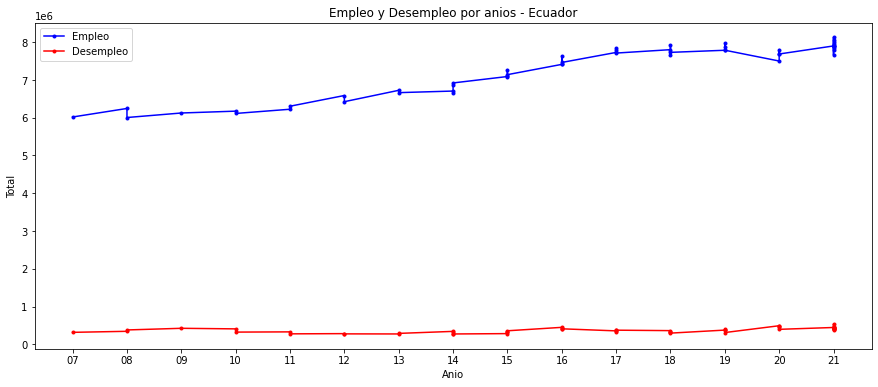

In [18]:
plt.figure(figsize=(15, 6))
plt.title('Empleo y Desempleo por anios - Ecuador')
plt.plot(dfMerge.Anio, dfMerge.Empleo, 'b.-')
plt.plot(dfMerge.Anio, dfMerge.Desempleo, 'r.-')
plt.xlabel('Anio')
plt.ylabel('Total')
plt.legend(['Empleo','Desempleo'])
plt.show()

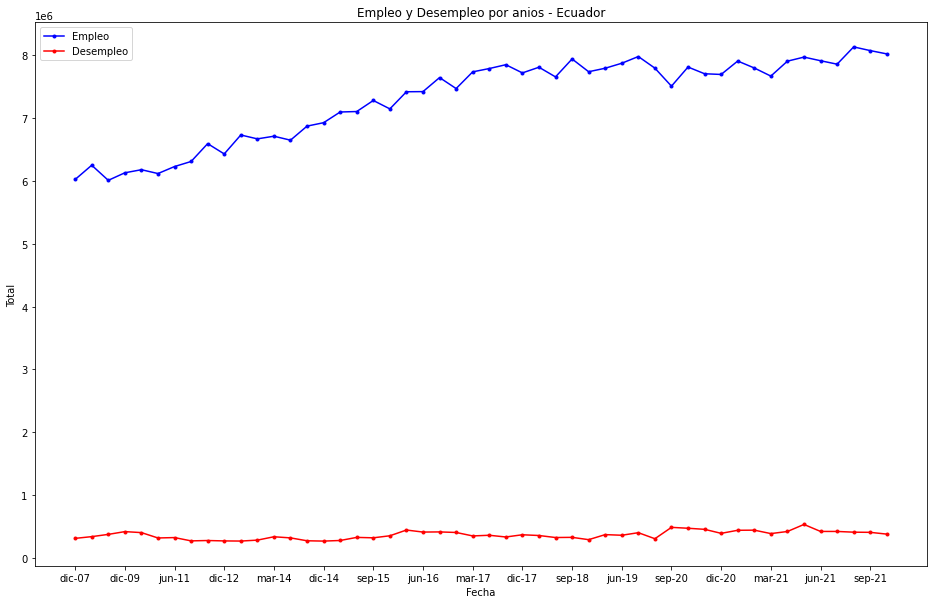

In [19]:
plt.figure(figsize=(16, 10))
plt.title('Empleo y Desempleo por anios - Ecuador')
plt.plot(dfMerge.Fecha, dfMerge.Empleo, 'b.-')
plt.plot(dfMerge.Fecha, dfMerge.Desempleo, 'r.-')
plt.xticks(dfMerge.Fecha[::3].tolist())
plt.xlabel('Fecha')
plt.ylabel('Total')
plt.legend(['Empleo','Desempleo'])
plt.show()

# Explicación
Se puede observar el el Empleo en el pais 5.5 veces mayor que el desempleo, tomando en cuenta los datos del 2007 al mes de septiembre de 2021. A partir de  Junio del 2019 hasta septiembre del 2020 se puede observar un bajon en el crecimiento del empleo en el pais. A partir de septiembre del 2020 se puede ver que la linea del empleo empieza a subir, esto se puede deber a que por esas fechas en el año 2020 se empezó a alzar medidas por la pandemia y la gente pudo movilizarce y realizar actividades turisticas como cotidianas sin restricciones de movilidad tan strictas.
a partir de Septiembre del 2020 se puede observar que el desempleo empezo a bajar, no considerablemente, experimento un pico mayor al resto entre marzo del 2021 hasta junio del 2021, para luego descender gradualmente hasta septiembre del 2021. 

# Sectorizacion del Empleo
Crear un grafico de pie por personas


1.   Limpiar el dataset.
# Eliminar los valores de %, reemplazar '-' a 0 y ',' a '.'



In [237]:
sectorizacion_empleo.rename(columns = {
'Unnamed: 1': 'Sector'}, inplace = True)

sectorizacion = sectorizacion_empleo.drop(['Característica'], axis=1)


In [249]:
#se reemplaza todos los datos '-' por 0
sectorizacion = sectorizacion.replace({'-' : 0})
# Reemplazar , por .
sectorizacion = sectorizacion.replace(',','.', regex=True)
#Quitar % para poder transformar a tipo float
sectorizacion = sectorizacion.replace('%','', regex=True)
sectorizacion.tail()

,Sector,jun-07,sep-07,dic-07,mar-08,jun-08,sep-08,dic-08,mar-09,jun-09,sep-09,dic-09,mar-10,jun-10,sep-10,dic-10,mar-11,jun-11,sep-11,dic-11,mar-12,jun-12,sep-12,dic-12,mar-13,jun-13,sep-13,dic-13,mar-14,jun-14,sep-14,dic-14,mar15,jun-15,sep-15,dic-15,mar-16,jun-16,sep-16,dic-16,mar-17,jun-17,sep-17,dic-17,mar-18,jun-18,sep-18,dic-18,mar-19,jun-19,sep-19,dic-19,sep-20,oct-20,nov-20,dic-20,ene-21,feb-21,mar-21,abr-21,may-21,jun-21,jul-21,ago-21,sep-21,oct-21
7,No Clasificados por Sector,4.4,4.1,7.7,5.1,6.2,5.1,6.4,4.8,5.5,5.1,6.0,5.4,6.2,4.1,4.6,4.2,5.0,4.1,4.8,2.5,5.9,4.6,4.9,4.2,4.2,3.4,4.7,4.2,4.4,3.5,4.7,3.4,5.0,4.3,4.7,4.6,3.8,4.4,5.0,3.5,3.5,2.8,3.6,3.2,3.2,3.5,4.2,4.3,4.9,3.6,5.1,3.6,3.7,3.5,4.4,5.2,6.1,5.1,4.7,5.6,6.3,6.2,5.3,4.8,4.4
8,Sector Formal,0,0,15.5,0,16.2,0,19.1,0,0,0,17.2,0,18.4,0,20.5,0,18.9,0,19.6,0,19.9,0,21.2,0,20.9,0,23.6,23.4,25.2,25.2,31.0,28.5,28.9,29.8,28.7,27.5,27.1,27.6,29.6,26.7,27.0,28.0,28.1,27.7,24.2,23.4,24.4,23.7,25.3,25.8,22.3,22.9,22.5,19.7,21.4,20.8,22.1,25.2,20.2,19.9,23.1,21.2,21.0,24.9,20.4
9,Sector Informal,0,0,66.7,0,68.1,0,64.2,0,0,0,65.6,0,64.5,0,65.7,0,64.4,0,63.2,0,64.9,0,62.8,0,66.4,0,61.1,63.2,59.0,65.4,57.6,60.7,59.3,58.4,59.5,63.2,63.4,63.7,60.6,65.8,65.7,65.8,64.0,65.0,69.2,69.4,68.3,69.3,67.5,67.4,69.5,71.4,72.8,73.8,71.6,72.8,69.0,68.8,72.0,73.6,70.8,71.6,71.2,69.9,74.8
10,Empleo Doméstico,0,0,1.5,0,1.8,0,1.9,0,0,0,2.0,0,1.9,0,1.8,0,1.5,0,1.6,0,1.6,0,1.7,0,1.7,0,2.1,2.7,1.9,1.6,2.2,1.8,1.5,1.5,1.6,1.1,1.3,1.6,1.8,1.2,1.4,1.4,1.4,1.4,1.4,1.1,1.4,1.3,1.4,1.3,1.7,0.9,0.6,1.2,1.2,0.8,0.8,0.9,0.8,0.9,1.3,1.1,1.0,1.3,0.9
11,No Clasificados por Sector,0,0,16.3,0,13.9,0,14.8,0,0,0,15.2,0,15.2,0,11.9,0,15.1,0,15.6,0,13.5,0,14.3,0,11.1,0,13.2,10.6,13.9,7.8,9.3,9.0,10.2,10.4,10.1,8.2,8.2,7.1,7.9,6.3,5.9,4.8,6.5,5.9,5.1,6.0,5.9,5.7,5.7,5.5,6.5,4.7,4.1,5.4,5.8,5.7,8.1,5.1,7.1,5.6,4.8,6.1,6.7,3.9,3.9


3. Transformar los datos a float

In [204]:
#Funcion para transformar las columnas a float
def toFloat(data, columnas):
  for i in columnas:
    data[i] = data[i].astype(float)
  return data

In [252]:
#Obtener la lista de las fechas para iterar por estas
fechasList = []
for col in sectorizacion:
  fechasList.append(col)
fechasList.pop(0)
print(fechasList)

['jun-07', 'sep-07', 'dic-07', 'mar-08', 'jun-08', 'sep-08', 'dic-08', 'mar-09', 'jun-09', 'sep-09', 'dic-09', 'mar-10', 'jun-10', 'sep-10', 'dic-10', 'mar-11', 'jun-11', 'sep-11', 'dic-11', 'mar-12', 'jun-12', 'sep-12', 'dic-12', 'mar-13', 'jun-13', 'sep-13', 'dic-13', 'mar-14', 'jun-14', 'sep-14', 'dic-14', 'mar15', 'jun-15', 'sep-15', 'dic-15', 'mar-16', 'jun-16', 'sep-16', 'dic-16', 'mar-17', 'jun-17', 'sep-17', 'dic-17', 'mar-18', 'jun-18', 'sep-18', 'dic-18', 'mar-19', 'jun-19', 'sep-19', 'dic-19', 'sep-20', 'oct-20', 'nov-20', 'dic-20', 'ene-21', 'feb-21', 'mar-21', 'abr-21', 'may-21', 'jun-21', 'jul-21', 'ago-21', 'sep-21', 'oct-21']


In [ ]:
sectorizacion = toFloat(sectorizacion, fechasList)

In [259]:
sectorizacion.head()

,Sector,jun-07,sep-07,dic-07,mar-08,jun-08,sep-08,dic-08,mar-09,jun-09,sep-09,dic-09,mar-10,jun-10,sep-10,dic-10,mar-11,jun-11,sep-11,dic-11,mar-12,jun-12,sep-12,dic-12,mar-13,jun-13,sep-13,dic-13,mar-14,jun-14,sep-14,dic-14,mar15,jun-15,sep-15,dic-15,mar-16,jun-16,sep-16,dic-16,mar-17,jun-17,sep-17,dic-17,mar-18,jun-18,sep-18,dic-18,mar-19,jun-19,sep-19,dic-19,sep-20,oct-20,nov-20,dic-20,ene-21,feb-21,mar-21,abr-21,may-21,jun-21,jul-21,ago-21,sep-21,oct-21
0,Sector Formal,0.0,0.0,41.0,0.0,42.5,0.0,43.9,0.0,0.0,0.0,43.7,0.0,44.9,0.0,47.2,0.0,46.3,0.0,46.5,0.0,47.4,0.0,48.7,0.0,47.6,0.0,49.3,48.7,50.9,51.2,50.9,49.9,51.2,50.6,50.5,48.7,49.0,47.7,47.6,47.0,47.9,47.4,48.9,48.3,46.0,46.8,46.2,45.7,45.9,46.5,44.7,41.6,42.6,41.0,40.9,41.9,41.4,42.1,39.9,39.7,42.3,40.6,41.2,43.9,41.4
1,Sector Informal,0.0,0.0,45.1,0.0,45.4,0.0,43.5,0.0,0.0,0.0,43.8,0.0,42.3,0.0,42.8,0.0,42.2,0.0,42.7,0.0,41.4,0.0,40.8,0.0,43.2,0.0,40.1,41.8,38.9,41.4,39.7,42.1,39.3,40.6,40.4,43.0,43.0,44.5,43.7,45.6,45.0,46.4,44.1,45.0,47.5,46.2,46.2,46.7,46.3,46.7,46.7,52.5,52.1,52.8,51.6,51.0,49.9,50.9,52.7,52.7,49.9,51.2,50.6,49.2,52.2
2,Empleo Doméstico,0.0,0.0,3.3,0.0,3.3,0.0,3.5,0.0,0.0,0.0,3.4,0.0,3.4,0.0,2.9,0.0,3.0,0.0,2.3,0.0,2.7,0.0,2.5,0.0,2.6,0.0,3.1,3.2,2.7,2.6,3.2,2.7,2.7,2.5,2.7,2.5,2.7,2.6,2.8,2.8,2.8,2.7,2.5,2.6,2.6,2.7,2.9,2.8,2.6,2.6,3.0,1.9,1.5,2.0,2.6,1.8,1.9,1.9,1.9,2.0,2.0,2.1,2.4,2.4,2.2
3,No Clasificados por Sector,0.0,0.0,10.6,0.0,8.8,0.0,9.2,0.0,0.0,0.0,9.1,0.0,9.3,0.0,7.1,0.0,8.4,0.0,8.4,0.0,8.5,0.0,8.0,0.0,6.6,0.0,7.5,6.3,7.4,4.9,6.2,5.3,6.8,6.3,6.5,5.8,5.3,5.3,6.0,4.5,4.3,3.4,4.5,4.1,3.9,4.3,4.8,4.8,5.2,4.3,5.6,4.0,3.8,4.2,4.9,5.4,6.8,5.1,5.5,5.6,5.8,6.2,5.8,4.5,4.2
4,Sector Formal,54.7,55.7,54.1,54.4,55.8,56.0,56.2,57.4,57.7,59.4,57.3,57.5,58.6,59.4,60.8,59.9,60.5,61.0,59.9,63.1,61.6,61.6,62.5,61.2,61.9,62.0,61.9,61.0,63.0,63.6,60.6,61.3,62.6,61.0,60.8,59.6,60.4,58.2,56.6,57.9,58.7,57.3,59.2,59.0,57.5,58.8,57.3,57.4,56.9,57.3,56.3,51.8,53.5,52.8,51.2,53.7,51.9,51.3,50.9,50.7,52.5,50.7,52.1,54.3,52.5



3. Asignar los datos Nacional, Urbano y Rural



In [255]:
nacional=sectorizacion.iloc[0:4]
urbano=sectorizacion.iloc[4:8]
rural=sectorizacion.iloc[8:12]

# Graficar los pies



1.   Importar librerias necesarias



In [224]:
#import librerias necesarias
from ipywidgets import interact  
from IPython.display import display
import ipywidgets as widgets
import plotly.graph_objects as go

2. Obtener porcentajes de fecha seleccionada

se crea una funcion la cual me devuelve la columna Sector y la fecha seleccionada pero cambiada el nombre a porcentajes por motivo de ilustracion

In [383]:
def formatear2(data, fecha):
  res = data.rename({ fecha : 'Porcentajes' },axis=1, inplace=False)
  return res[['Sector', 'Porcentajes']]



3. Generar el pie



In [391]:
salida = widgets.Output()
salida_plot = widgets.Output()
ALL = 'ALL'
dropdown_Periodo = widgets.Dropdown(options = fechasList, description = 'Fecha')

#funcion filtrar df & plot

def filtroPie(fecha,j):
    salida.clear_output()
    salida_plot.clear_output()
    if fecha == ALL:
      print('')
    else:
        dataNacional = formatear2(nacional, fecha)
        dataUrbano = formatear2(urbano, fecha)
        dataRural = formatear2(rural, fecha)
        
    with salida:
        display(filtroPie)
        
    with salida_plot:
        print('Sectorizacion')
        plt.figure()
        colores = ['cyan', 'yellow', 'limegreen','powderblue']
        plt.pie(dataNacional['Porcentajes'], labels=dataNacional['Sector'], colors=colores, autopct='%.2f %%')
        plt.title('Nacional'+' '+'Fecha'+' '+fecha)
        
        print('   ')
        plt.figure()
        plt.pie(dataUrbano['Porcentajes'], labels=dataUrbano['Sector'], colors=colores, autopct='%.2f %%')
        plt.title('Urbano'+' '+'Fecha'+' '+fecha)

        print('    ')
        plt.figure()
        plt.pie(dataRural['Porcentajes'], labels=dataRural['Sector'], colors=colores, autopct='%.2f %%')
        plt.title('Rural'+' '+'Fecha'+' '+fecha)
        plt.show()    
def dropdown_Fecha_eventhandler (change):
    filtroPie(change.new, dropdown_Periodo.value)
dropdown_Periodo.observe(dropdown_Fecha_eventhandler, names ='value')
tab  = widgets.Tab([salida_plot])
tab.set_title(1,'Gráficos')
dashboard = widgets.VBox([dropdown_Periodo,tab])
display(dashboard);

# Apreciacion
En el año 2021 se puede observar que el sector informal abarca un 52% en las actividades económicas nacionales; sin embargo, al revisar la grafica del Sector Urbano se puede observar que este es dominante, con un 52.55% y el informal con un 40.24%. A pesar de que el sector formal en el area urbana es mayor, esta se ve afectada puesto que el comercio informal es mayor en el area rural, teniendo un 78.80% y el sector formal con un 20.40%.
Comparando estos datos con los del 2020 se puede observar que el lo que va de 1 año, el empleo informal ha subido en un 1% a nivel nacional y a nivel rural en un 7.20% en tan solo un año.

Al revisar datos de años anteriores podemos observar que este patron se repite, el sector informal es mayoría y en el año 2013 sorprendentemente este es menor, contando con un 40.10% y el sector formal con un impresionante 49.30%. 

# Grafica de Barras

In [400]:
poblacionesClean = poblacionesClean.replace('.','', regex=True)

In [ ]:
poblacionesClean.head()

In [406]:
poblacionesClean['Total'] = poblacionesClean['Total'].str.replace('.','').astype(int)

In [417]:
# Hacer un split de la fecha por mes y anio
poblacionesClean[['Mes', 'Anio']] = poblacionesClean['Periodo'].str.split('-', expand=True)

In [419]:
poblacionesClean[['Anio','Indicadores','Total']].head()

,Anio,Indicadores,Total
0,07,Población Total,13682302
1,07,Población menor de 15 años,4372812
2,07,Población en Edad de Trabajar (PET),9309490
3,07,Población Económicamente Activa,6336029
4,07,Empleo,6019332


In [420]:
# Ver todas las ocurrencias de 'Subempleo' en la columna de indicadores
sEF = poblacionesClean.loc[poblacionesClean['Indicadores'] == 'Subempleo']
sEF[['Anio','Indicadores', 'Total']].head()

,Anio,Indicadores,Total
6,07,Subempleo,1155872
24,08,Subempleo,1130699
42,08,Subempleo,957978
60,09,Subempleo,1071615
78,10,Subempleo,1041266


In [421]:
# Ver todas las ocurrencias de 'Adecuado' en la columna de indicadores
emPleno = poblacionesClean.loc[poblacionesClean['Indicadores'] == 'Empleo Adecuado/Pleno']
emPleno[['Anio','Indicadores', 'Total']].head()


,Anio,Indicadores,Total
5,07,Empleo Adecuado/Pleno,2737158
23,08,Empleo Adecuado/Pleno,2750595
41,08,Empleo Adecuado/Pleno,2858659
59,09,Empleo Adecuado/Pleno,2565691
77,10,Empleo Adecuado/Pleno,2715542


In [425]:
# Ver todas las ocurrencias de 'No pleno' en la columna de indicadores
noPleno = poblacionesClean.loc[poblacionesClean['Indicadores'] == 'Otro Empleo no pleno']
noPleno[['Anio','Indicadores', 'Total']].tail()

,Anio,Indicadores,Total
820,21,Otro Empleo no pleno,2254112
838,21,Otro Empleo no pleno,2204818
856,21,Otro Empleo no pleno,2451125
874,21,Otro Empleo no pleno,2340071
892,21,Otro Empleo no pleno,2325638


In [ ]:
#Subempleo
#Seleccionar los datos importantes
subEmpDF = sEF[['Anio', 'Total']]
#Cambiar el nombre de las columnas
subEmpDF.rename(columns = {
   'Total': 'Subempleo'}, inplace = True)

In [ ]:
#EmpleoAdecuado
#Seleccionar los datos importantes
empAdeDF = emPleno [['Anio', 'Total']]
#Cambiar el nombre de las columnas
empAdeDF.rename(columns = {
'Total': 'Adecuado'}, inplace = True)

In [ ]:
#Subempleo
#Seleccionar los datos importantes
noPlenoDF = noPleno[['Anio', 'Total']]
#Cambiar el nombre de las columnas
noPlenoDF.rename(columns = {
'Total': 'No_pleno'}, inplace = True)

In [511]:
finalMerge = pd.merge(subEmpDF, empAdeDF, on=['Anio'])
finalMerge.head()

,Anio,Subempleo,Adecuado
0,07,1155872,2737158
1,08,1130699,2750595
2,08,1130699,2858659
3,08,957978,2750595
4,08,957978,2858659


In [512]:
fMerge = pd.merge(finalMerge, noPlenoDF, on=['Anio'])
fMerge.head()

,Anio,Subempleo,Adecuado,No_pleno
0,07,1155872,2737158,1504000
1,08,1130699,2750595,1688693
2,08,1130699,2750595,1649349
3,08,1130699,2858659,1688693
4,08,1130699,2858659,1649349


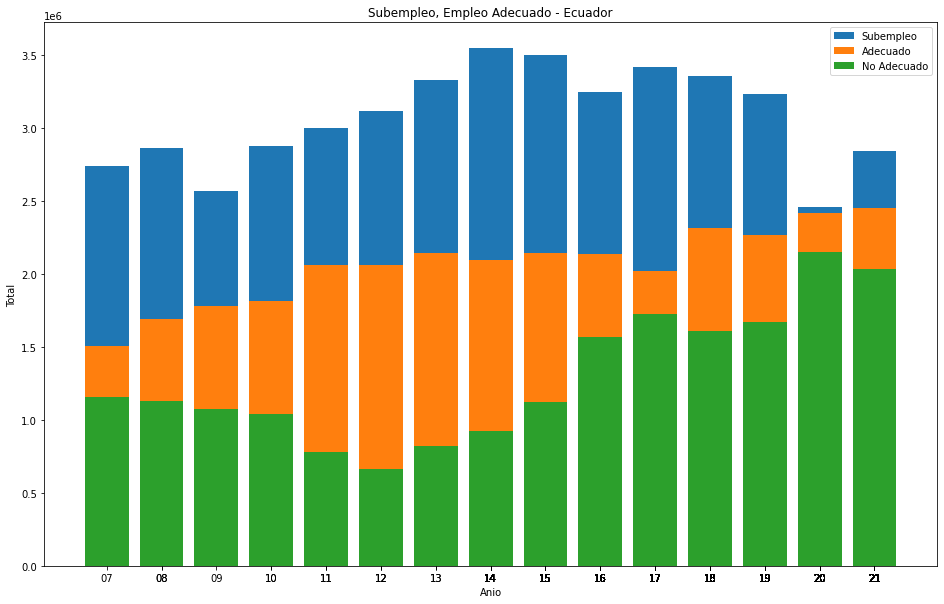

In [438]:
plt.figure(figsize=(16, 10))
plt.title('Subempleo, Empleo Adecuado - Ecuador')


plt.bar(fMerge.Anio, fMerge.Adecuado)
plt.bar(fMerge.Anio, fMerge.No_pleno)
plt.bar(fMerge.Anio, fMerge.Subempleo)
plt.xticks(fMerge.Anio[::3].tolist())
plt.xlabel('Anio')
plt.ylabel('Total')
plt.legend(['Subempleo','Adecuado', 'No Adecuado'])
plt.show()

# Histograma parametrizado

1. Transformar los datos del año a tipo int

In [513]:
final = fMerge
final['Anio'] =  fMerge['Anio'].astype(int)

In [ ]:
subEmpDF['Anio'] = subEmpDF['Anio'].astype(int)
empAdeDF['Anio'] = empAdeDF['Anio'].astype(int)
noPlenoDF['Anio'] = noPlenoDF['Anio'].astype(int)

2. Funcion para obtener el rango de años entre 2 entradas de fechas

In [496]:
def generar(ini, fin):
  ns =[]
  if(fin<ini):
    ns = list(range(fin, ini+1))
  else:
    ns = list(range(ini, fin+1))
  return ns

3. Funcion para devolver los datos que se encuentran en el rango de años ingresado

In [516]:
def filtrarPorAnio(data, inicio, fin):
  ns=[]
  ns = generar(inicio, fin)
  res = data[data['Anio'].isin(ns)]
  return res

In [542]:
aa = filtrarPorAnio(final, 21, 21)
aa.head(10)

,Anio,Subempleo,Adecuado,No_pleno
490,21,1880451,2671030,2193853
491,21,1880451,2671030,2207163
492,21,1880451,2671030,2190745
493,21,1880451,2671030,2243726
494,21,1880451,2671030,2248648
495,21,1880451,2671030,2254112
496,21,1880451,2671030,2204818
497,21,1880451,2671030,2451125
498,21,1880451,2671030,2340071
499,21,1880451,2671030,2325638


4. Lista de años disponibles

In [522]:
aniosList=[]
aniosList=generar(7,21)
print(aniosList)

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


5. Graficar con parametros

In [543]:
output = widgets.Output()
outout_plot = widgets.Output()
ALL = 'ALL'

#creo desplegable

dropdown_anioInicio = widgets.Dropdown(options = aniosList, description = 'Anio Inicio')
dropdown_anioFin = widgets.Dropdown(options = aniosList, description = 'Anio Fin')

#funcion filtrar df & plot

def filtroHistA (inicio, fin):
    output.clear_output()
    outout_plot.clear_output()
    

    if (inicio == ALL) & (fin == ALL):
        filtro = final
    else:
        glData = filtrarPorAnio(final, inicio, fin)
        subempleoData = filtrarPorAnio(subEmpDF, inicio,fin)
        adecuadoData = filtrarPorAnio(empAdeDF, inicio,fin)
        noAdecuadoData = filtrarPorAnio(noPlenoDF, inicio,fin)
        
    with output:
        display(filtroHistA)
        
    with outout_plot:
      barWidth = 0.3
      fig = plt.subplots(figsize =(18, 8))

      IT = np.array(subempleoData["Subempleo"])
      ECE = np.array(adecuadoData["Adecuado"])
      CSE = np.array(noAdecuadoData["No_pleno"])
      
      ba1 = np.arange(len(IT))
      ba2 = [x + barWidth for x in ba1]
      ba3 = [x + barWidth for x in ba2]
      plt.bar(ba1, IT, color ='cyan', width = barWidth,
              edgecolor ='black', label ='Subempleo')
      plt.bar(ba2, ECE, color ='powderblue', width = barWidth,
              edgecolor ='black', label ='Empleo Pleno')
      plt.bar(ba3, CSE, color ='yellow', width = barWidth,
              edgecolor ='black', label ='Empleo No pleno')
      plt.xlabel('Anio', fontweight ='bold', fontsize = 15)
      plt.ylabel('Datos poblaciones en millones', fontweight ='bold', fontsize = 15)
      plt.title('Subempleo, Empleo pleno y empleo no pleno')
      plt.xticks([r + barWidth for r in range(len(IT))],
              np.array(glData["Anio"]))
      plt.legend()
      plt.show()       
def dropdown_inicio_eventhandler (change):
    filtroHistA( dropdown_anioInicio.value, change.new)  
def dropdown_fin_eventhander(change):
    filtroHistA(change.new,dropdown_anioFin.value)
dropdown_anioFin.observe(dropdown_inicio_eventhandler, names ='value')
dropdown_anioInicio.observe (dropdown_fin_eventhander, names = 'value')
tab  = widgets.Tab([outout_plot])
tab.set_title(1,'Gráficos')
dashboard = widgets.VBox([dropdown_anioInicio,dropdown_anioFin, tab])
display(dashboard);

# Apreciación
Se puede observar que el Empleo pleno tiene una tendencia a ser mayor, mientras que el empleo no pleno esta en segunda posicion en cuanto a poblacion en millones y el subempleo esta en al último. Sin embargo en el 2020 se puede observar que estos en el segundo cuarto del 2020 estan casi igualados, esto se puede deber a que a partir de Marzo del 2020 la pandemia empezo y se dio un cese a una gran cantidad de actividades comerciales, asi también como el giro a los trabajos remotos debido a la necesidad del distanciamiento social. En el 2021 se puede observar una brecha mayor en cuanto al empleo pleno y una estabilizacion en cuanto al subempleo y empleo no pleno.

# Conclusiones
Es importante realizar una buena limpieza de datos, tomando en cuanta el no eliminar o descartar datos que no contengan información, es mejor reemplazarlos estos por ceros o valores apropiados para el caso de estudio. Pandas es una herramienta bastante util para la ciencia de datos y en conjunto con la librería MatPlotLib nos permite realizar gráficas de alto valor para transmitir los datos analisados y transformarlos en conocimiento. 